# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../DAT-NYC-39/projects/unit-projects/project-2/assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
print df_raw.shape

(400, 4)


Answer: 400

#### Question 2. Create a summary table

In [7]:
df_raw.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: A sample scaled across a larger range will have larger standard deviation.  GRE has a range of 580 here, gpa has a range of 1.74

#### Question 4. Drop data points with missing data


In [9]:

df = df_raw.dropna()
print df.shape
print len(df[df.gpa.notnull()])
print len(df[df.prestige.notnull()])
print len(df[df.gre.notnull()])


(397, 4)
397
397
397


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I have 397 rows.  I also have 397 rows with no nulls in each column.

#### Question 6. Create box plots for GRE and GPA

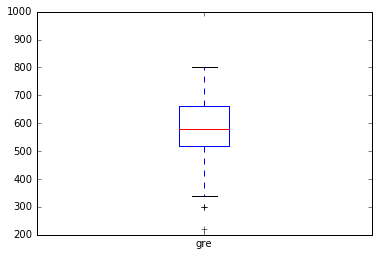

In [10]:
df.gre.plot(kind='box',ylim=(200,1000))

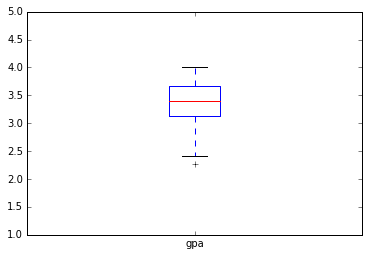

In [11]:
df.gpa.plot(kind='box',ylim=(1,5))

#### Question 7. What do this plots show?

GPA appears normally distributed, but GRE is skewed higher than the median

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D583128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA585C0>]], dtype=object)

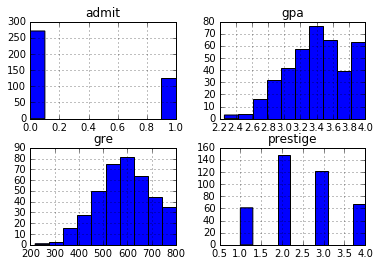

In [13]:
# plot the distribution of each variable
df.hist()



#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No.  The GRE appears skewed

#### Question 10.  Does this distribution need correction? If so, why? How? 

No, it is only a little askew
    

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data
df.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA are most highly correlated, but not enough to be a functions of one another.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I'd create some dummy variables for the prestige levels, n - 1. I'd check how various predictors correlate with each other to test linearity, and then check how various predictors correlate with outcomes (admission).

#### Question 14. What is your hypothesis? 

Answer: High prestige is negatively associated with admission

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data